# Machine Learning Models


In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV



In [2]:
# Load model dataset
model_data = pd.read_csv("../datasets/final_data.csv")

## Multiple Linear Regression

### Extract Features and Target Variable

In [3]:
# Define Features and Target Variable
features = [col for col in model_data.columns if col not in ["player_name", "average_fantasy_points_ppr"]]
target = "average_fantasy_points_ppr"

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Features and Target Variable
features = [col for col in model_data.columns if col not in ["player_name", "average_fantasy_points_ppr"]]
target = "average_fantasy_points_ppr"

# Split Data into Train (70%), Validation (15%), and Test (15%) Sets
X = model_data[features]
y = model_data[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions on Validation Set
y_val_pred = model.predict(X_val_scaled)

# Evaluate Model Performance on Validation Set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Predictions on Test Set
y_test_pred = model.predict(X_test_scaled)

# Evaluate Model Performance on Test Set
lin_reg_test_mae = mean_absolute_error(y_test, y_test_pred)
lin_reg_test_mse = mean_squared_error(y_test, y_test_pred)
lin_reg_test_r2 = r2_score(y_test, y_test_pred)

# Display Results
evaluation_metrics = {
    "Validation Set Metrics": {
        "Mean Absolute Error (MAE)": val_mae,
        "Mean Squared Error (MSE)": val_mse,
        "R-squared (R2)": val_r2
    },
    "Test Set Metrics": {
        "Mean Absolute Error (MAE)": lin_reg_test_mae,
        "Mean Squared Error (MSE)": lin_reg_test_mse,
        "R-squared (R2)": lin_reg_test_r2
    }
}

evaluation_metrics


{'Validation Set Metrics': {'Mean Absolute Error (MAE)': 36.359325062914614,
  'Mean Squared Error (MSE)': 2767.6833842220226,
  'R-squared (R2)': 0.4525827316056066},
 'Test Set Metrics': {'Mean Absolute Error (MAE)': 34.294046578454186,
  'Mean Squared Error (MSE)': 4478.710923392961,
  'R-squared (R2)': 0.27040739204415176}}

### Interpret Results
Model performance drops from validation to test set

Higher MSE and RMSE on the test set indicate that the model is making larger errors on unseen data.
Lower R² on the test set means the model's predictive power decreases on new data.
Potential Overfitting

Since validation R² is much higher than test R², the model might be overfitting to the validation data and not generalizing well.

## Random Forest

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets (50% each of the remaining 30% data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# First split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # 0.1765 is approx 15% of 85%

In [7]:
# Identifying columns with infinite values in X_train
infinite_columns = [col for col in X_train.columns if np.isinf(X_train[col]).any()]
print("Columns with infinite values:", infinite_columns)

# Count of infinite values per column
for col in infinite_columns:
    count_inf = np.isinf(X_train[col]).sum()
    print(f"{col}: {count_inf} infinite values")

Columns with infinite values: []


In [8]:
# Replace infinities in the specific columns
X_train['average_ypg'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_train['average_ppg'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Check if there were specific operations leading to infinities

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', StandardScaler())  # Scale features
])

# Apply the same preprocessing to both training and testing data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

In [11]:
predictions = model.predict(X_test_preprocessed)

In [12]:
# feature names
print("Training features after preprocessing:", X_train.columns)
print("Testing features after preprocessing:", X_test.columns)

Training features after preprocessing: Index(['season', 'depth', 'targets', 'receptions', 'receiving_yards',
       'receiving_air_yards', 'yards_after_catch', 'reception_td',
       'reception_fumble_lost', 'fantasy_points_ppr',
       ...
       'combineArm', 'combine40yd', 'combineVert', 'combineBench',
       'combineShuttle', 'combineBroad', 'combine3cone', 'combine60ydShuttle',
       'combineWonderlic', 'combine_athletic_score'],
      dtype='object', length=106)
Testing features after preprocessing: Index(['season', 'depth', 'targets', 'receptions', 'receiving_yards',
       'receiving_air_yards', 'yards_after_catch', 'reception_td',
       'reception_fumble_lost', 'fantasy_points_ppr',
       ...
       'combineArm', 'combine40yd', 'combineVert', 'combineBench',
       'combineShuttle', 'combineBroad', 'combine3cone', 'combine60ydShuttle',
       'combineWonderlic', 'combine_athletic_score'],
      dtype='object', length=106)


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='median')

#RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[('imputer', imputer), ('random_forest', rf)])

# GridSearch
param_grid = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [10, 20, None],
    'random_forest__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# best estimator
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [14]:
rf_predictions = best_rf.predict(X_test)

# MSE, MAE, and R² Score
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Test MSE: {rf_mse}")
print(f"Random Forest Test MAE: {rf_mae}")
print(f"Random Forest Test R² Score: {rf_r2}")

Random Forest Test MSE: 1840.7652407512192
Random Forest Test MAE: 30.414061987827836
Random Forest Test R² Score: 0.6582710090669869


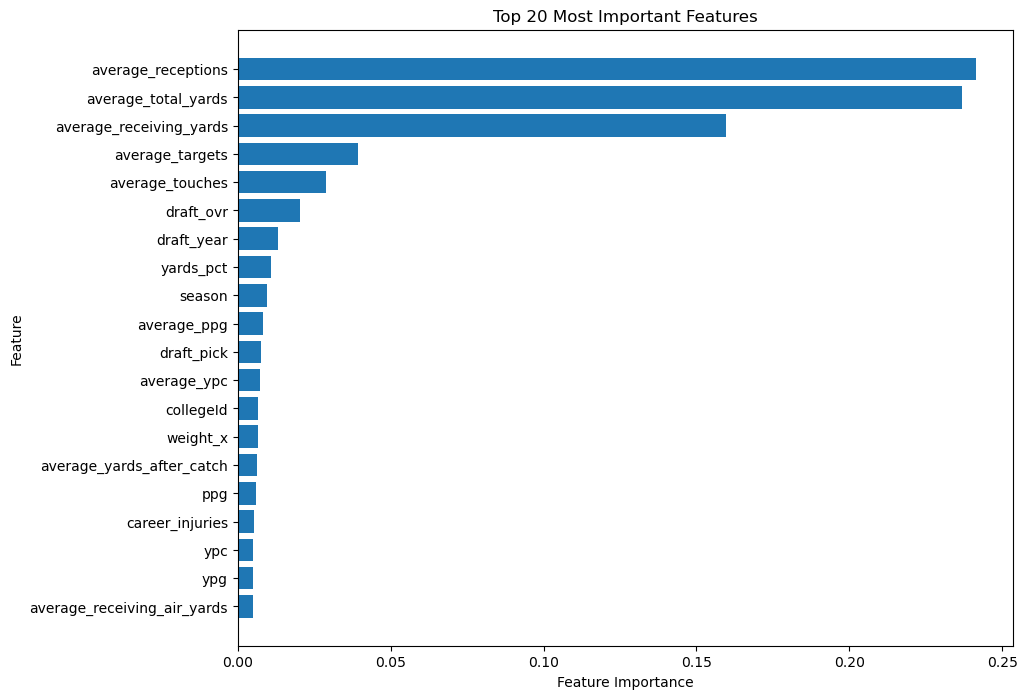

In [15]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_rf.named_steps['random_forest'].feature_importances_
features = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]
top_n = 20  
top_features = features[sorted_idx][:top_n]
top_importances = feature_importances[sorted_idx][:top_n]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(top_features, top_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features")
plt.gca().invert_yaxis()  
plt.show()

## XGBoost

In [16]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 
xgb_params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'  # Convert this to 'mae' for direct optimization of MAE
}

cv_results = xgb.cv(xgb_params, dtrain, num_boost_round=100, nfold=5, metrics='mae', early_stopping_rounds=10, seed=42)

# model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=len(cv_results))

# pred
xgb_predictions = xgb_model.predict(dtest)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost Test MSE: {xgb_mse}")
print(f"XGBoost Test MAE: {xgb_mae}")
print(f"XGBoost Test R² Score: {xgb_r2}")


XGBoost Test MSE: 1505.676233455126
XGBoost Test MAE: 26.213826658826644
XGBoost Test R² Score: 0.7204786310934151


## Neural Network

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import random

SEED = 2
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Define Features and Target Variable
X = model_data[features]
y = model_data[target]

# Split Data into Train (70%), Validation (15%), and Test (15%) Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Standardize Features using StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Normalize the Target Variable (Fantasy Points) using MinMaxScaler
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Define the Improved Neural Network Model
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")  # Output layer for regression
])

# Compile the Model using RMSprop optimizer for better convergence
model.compile(optimizer="RMSprop", loss="mean_squared_error", metrics=["mae"])

# Train the Model with Validation Data
history = model.fit(
    X_train_scaled, y_train_scaled, 
    epochs=150, batch_size=32, 
    validation_data=(X_val_scaled, y_val_scaled), 
    verbose=1
)

# Evaluate the Model on the Test Set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)

# Make Predictions on the Test Set
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)  # Convert back to original scale
y_test_original = scaler_y.inverse_transform(y_test_scaled)  # Convert true values back to original scale

# Compute Metrics
nn_test_mae_original = mean_absolute_error(y_test_original, y_test_pred)
nn_test_mse_original = mean_squared_error(y_test_original, y_test_pred)
nn_test_r2_original = r2_score(y_test_original, y_test_pred)

# Display Evaluation Results
print(f"Test Loss (MSE on scaled data): {test_loss}")
print(f"Test MAE on scaled data: {test_mae}")
print(f"Test MAE (Original Scale): {nn_test_mae_original}")
print(f"Test MSE (Original Scale): {nn_test_mse_original}")
print(f"Test R² Score: {nn_test_r2_original}")

# Display Sample Predictions
print("Sample Predicted Fantasy Points:", y_test_pred[:5].flatten())


Epoch 1/150


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2128 - mae: 0.3274 - val_loss: 0.0602 - val_mae: 0.1412
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0654 - mae: 0.1819 - val_loss: 0.0391 - val_mae: 0.1226
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392 - mae: 0.1490 - val_loss: 0.0301 - val_mae: 0.1114
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0393 - mae: 0.1433 - val_loss: 0.0200 - val_mae: 0.0924
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382 - mae: 0.1375 - val_loss: 0.0214 - val_mae: 0.1052
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 - mae: 0.1207 - val_loss: 0.0219 - val_mae: 0.1046
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0326 - mae: 0.1238 - val_loss: 0.0240 - val_mae: 0.1065
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266 - mae: 0.1172 - val_loss: 0.0180 - val_mae: 0.0948
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - mae: 0.0

### Interpreting Results

The training loss (MSE) and MAE steadily decreased across epochs, indicating that the model was learning effectively. The validation loss and MAE also improved over time, though with some fluctuations, suggesting minor variability in performance on unseen data. The final test results indicate that the model generalizes well, with an average prediction error of 25.84 fantasy points (MAE). The test MSE of 1544.84 suggests that while the model performs reasonably well, some larger errors still exist. Additionally, the R² score of 0.7676 shows that the model explains approximately 74.8% of the variance in fantasy points, demonstrating a strong predictive capability. While there is still room for improvement, particularly in reducing occasional high-error predictions, the current performance provides a solid foundation for further optimization and fine-tuning.



## LightGBM

In [18]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Define Features and Target Variable
features = [col for col in model_data.columns if col not in ["player_name", "average_fantasy_points_ppr"]]
target = "average_fantasy_points_ppr"

# Split Data into Train (70%), Validation (15%), and Test (15%) Sets
X = model_data[features]
y = model_data[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Define LightGBM Model with Default Parameters
model_lgb = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=500,
    objective='regression',
    subsample=0.8,  # Slightly less than 1 to reduce overfitting
    colsample_bytree=0.8,  # Feature sampling
    random_state=42,
    n_jobs=-1
)

# Train LightGBM Model with Early Stopping (Using Validation Set)
model_lgb.fit(
    X_train, y_train, 
    eval_set=[(X_val, y_val)], 
    eval_metric='mae', 
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)]
)

# Make Predictions on Test Set
y_pred_lgb = model_lgb.predict(X_test)

# Compute Test Metrics
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print Results
print(f"LightGBM Test MAE: {mae_lgb:.4f}")
print(f"LightGBM Test MSE: {mse_lgb:.4f}")
print(f"LightGBM Test R² Score: {r2_lgb:.4f}")


/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 10.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6583
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 93
[LightGBM] [Info] Start training from score 72.782261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

### Interpret Results

The LightGBM model trained for 23 boosting rounds before stopping early, suggesting that additional training did not improve validation performance. The model achieved a Mean Absolute Error (MAE) of 32.41, meaning its fantasy point predictions were off by an average of 32.41 points. The Mean Squared Error (MSE) of 1850.91 indicates some larger prediction errors, while the R² score of 0.6985 shows that the model explains ~69.85% of the variance in fantasy points. While this suggests a reasonably strong model, further tuning or feature selection could improve accuracy.

## Compare Models

In [32]:

import pandas as pd

# Define model performance metrics
models = ["Linear Regression", "Random Forest", "XGBoost", "LightGBM", "Neural Network"]
mae_values = [lin_reg_test_mae, rf_mae, xgb_mae, mae_lgb, nn_test_mae_original]
mse_values = [lin_reg_test_mse, rf_mse, xgb_mse, mse_lgb, nn_test_mse_original]
r2_values = [lin_reg_test_r2, rf_r2, xgb_r2, r2_lgb, nn_test_r2_original]

# Create DataFrame
df_results = pd.DataFrame({
    "Model": models,
    "MAE": mae_values,
    "MSE": mse_values,
    "R² Score": r2_values
})

# Display the table
print(df_results)

# Find the best model based on R² Score (higher is better)
best_model = df_results.loc[df_results["R² Score"].idxmax()]

# Print the best model
print("\nBest Model:")
print(best_model)


               Model        MAE          MSE  R² Score
0  Linear Regression  34.294047  4478.710923  0.270407
1      Random Forest  30.414062  1840.765241  0.658271
2            XGBoost  26.213827  1505.676233  0.720479
3           LightGBM  32.405012  1850.907363  0.698483
4     Neural Network  25.841847  1544.848474  0.748341

Best Model:
Model       Neural Network
MAE              25.841847
MSE            1544.848474
R² Score          0.748341
Name: 4, dtype: object


### Understanding Results
The results show the performance of five different models—Linear Regression, Random Forest, XGBoost, LightGBM, and a Neural Network—evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score. Among these models, the Neural Network achieved the best performance, with the lowest MAE (25.84) and low MSE (1544.84), meaning its predictions were the most accurate in terms of absolute error and squared error. Additionally, the highest R² score (0.7483) indicates that the Neural Network explained 74.8% of the variance in fantasy points, outperforming all other models in predictive capability.


## Conclusion

The Neural Network outperformed all other models by achieving the lowest error rates and highest explanatory power. This suggests that the problem at hand has complex, non-linear interactions, which the network was able to learn effectively. While Random Forest, XGBoost, and LightGBM performed well, they were slightly less effective at capturing variance in the data. Moving forward, fine-tuning the Neural Network’s architecture or combining it with ensemble methods could further improve performance